In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

import pandas as pd
from numpy.random import random
import datetime as dt
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from scipy.signal import periodogram
import math

from pytsviz.viz import *

In [3]:
dataset_size=366

In [4]:
n_features = 3

Target series

In [5]:
t_axis = pd.date_range(start='1/1/2020', periods = dataset_size, freq="D", name="t")

In [6]:
y = (1 + random(dataset_size)) * np.linspace(6, 9, dataset_size) + \
    (1 + random(dataset_size)) * np.sin(np.linspace(0, 10*np.pi, dataset_size)) + \
    (1.5 + random(dataset_size)) * np.cos(np.linspace(0, 5.4*np.pi, dataset_size))
ts = pd.Series(index=t_axis, data=y, name="y")
ts_df = ts.to_frame()

Features

In [7]:
feat_matrix = random((n_features, dataset_size))
feat_df = pd.DataFrame(index=t_axis, data={f"x_{i}": feat_matrix[i] for i in range(n_features)})

Forecast

In [8]:
ext_t_axis = pd.date_range(start='2/1/2020', periods = dataset_size, freq="D", name="t")

In [9]:
y_hat = y * (1 + 0.1 * random())

forecast = pd.Series(index=ext_t_axis, data=y_hat, name="y_hat")
forecast_df = forecast.to_frame()

In [10]:
c_lower = [y_hat[i] - (0.001 * i) ** 1.2 for i in range(len(y_hat))]
c_upper = [y_hat[i] + (0.001 * i) ** 1.2 for i in range(len(y_hat))]
confidence_df = pd.DataFrame(index=ext_t_axis, data={"lower confidence": c_lower, "upper confidence": c_upper})

In [11]:
total_df = pd.concat([ts, feat_df, forecast_df, confidence_df], axis = 1)

In [12]:
total_df

y       x_0       x_1       x_2      y_hat  \
t                                                                
2020-01-01   8.918116  0.070498  0.590799  0.023014        NaN   
2020-01-02  10.669143  0.358088  0.092290  0.757966        NaN   
2020-01-03  11.855201  0.876785  0.024224  0.341035        NaN   
2020-01-04  11.662385  0.994497  0.286643  0.040347        NaN   
2020-01-05  12.822046  0.086580  0.943122  0.878669        NaN   
...               ...       ...       ...       ...        ...   
2021-01-27        NaN       NaN       NaN       NaN  10.710002   
2021-01-28        NaN       NaN       NaN       NaN  18.009873   
2021-01-29        NaN       NaN       NaN       NaN  11.243644   
2021-01-30        NaN       NaN       NaN       NaN  17.574477   
2021-01-31        NaN       NaN       NaN       NaN  13.078099   

            lower confidence  upper confidence  
t                                               
2020-01-01               NaN               NaN  
2020-01-02               NaN               NaN  
2020-01-03               NaN               NaN  
2020-01-04               NaN               NaN  
2020-01-05               NaN               NaN  
...                      ...               ...  
2021-01-27         10.415554         11.004450  
2021-01-28         17.714446         18.305300  
2021-01-29         10.947238         11.540051  
2021-01-30         17.277090         17.871863  
2021-01-31         12.779732         13.376467  

[397 rows x 7 columns]

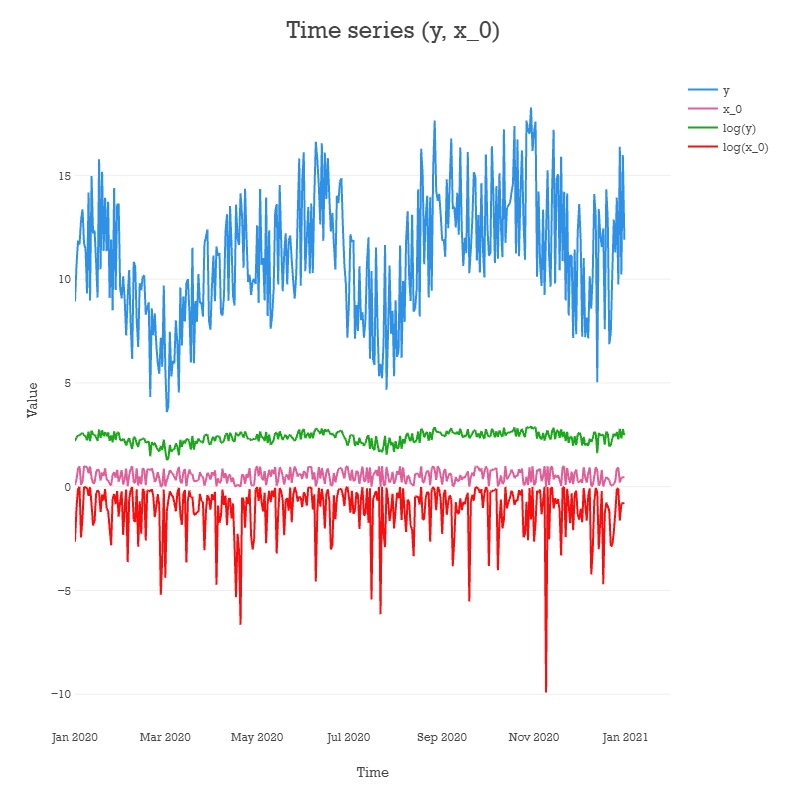

In [13]:
fig = plot_ts(total_df, y_cols=["y", "x_0"], tf="log", tf_args = (np.e,), keep_original=True)

In [14]:
func1 = lambda x : x.isocalendar().week
func2 = lambda x : x.isocalendar().day

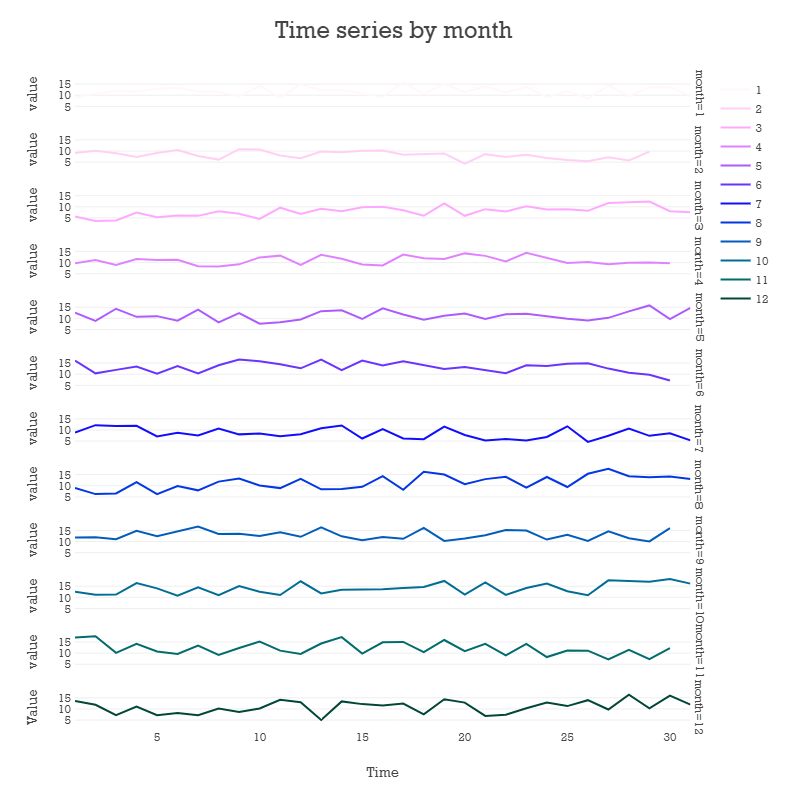

In [15]:
plot_seasonal_ts(ts_df, period="month", subplots=True)

                    y
t                    
2020-01-01   8.918116
2020-01-02  10.669143
2020-01-03  11.855201
2020-01-04  11.662385
2020-01-05  12.822046
...               ...
2020-12-27   9.741380
2020-12-28  16.381045
2020-12-29  10.226760
2020-12-30  15.985027
2020-12-31  11.895305

[366 rows x 1 columns]


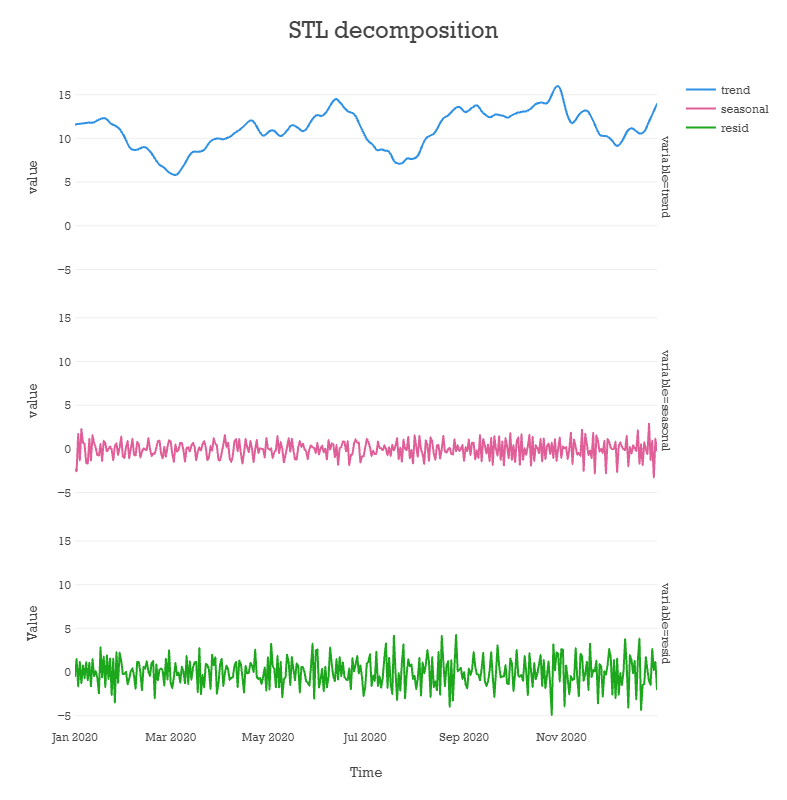

In [16]:
plot_decomposed_ts(ts_df, method = "STL", subplots = True)

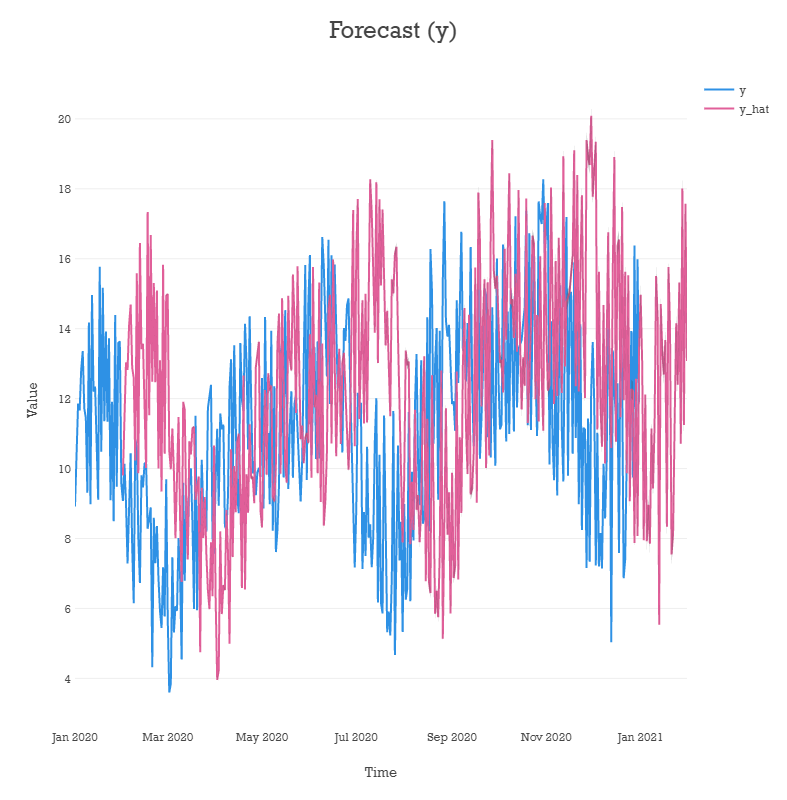

In [17]:
inverted_df = pd.DataFrame(total_df.values[::-1], total_df.index, total_df.columns)
#forecast_plot(inverted_df, ts_col = "y", fc_cols = ["y_hat"], lower_col = "lower confidence", upper_col = "upper confidence")

y_hat_2 = pd.Series(data=y_hat*0.9, index = ext_t_axis, name = "y_hat_2")
multiple_fc_df = pd.concat([total_df, y_hat_2], axis = 1)
plot_forecast(multiple_fc_df, y_col = "y", fc_cols = ["y_hat"], upper_col = "upper confidence", lower_col = "lower confidence")

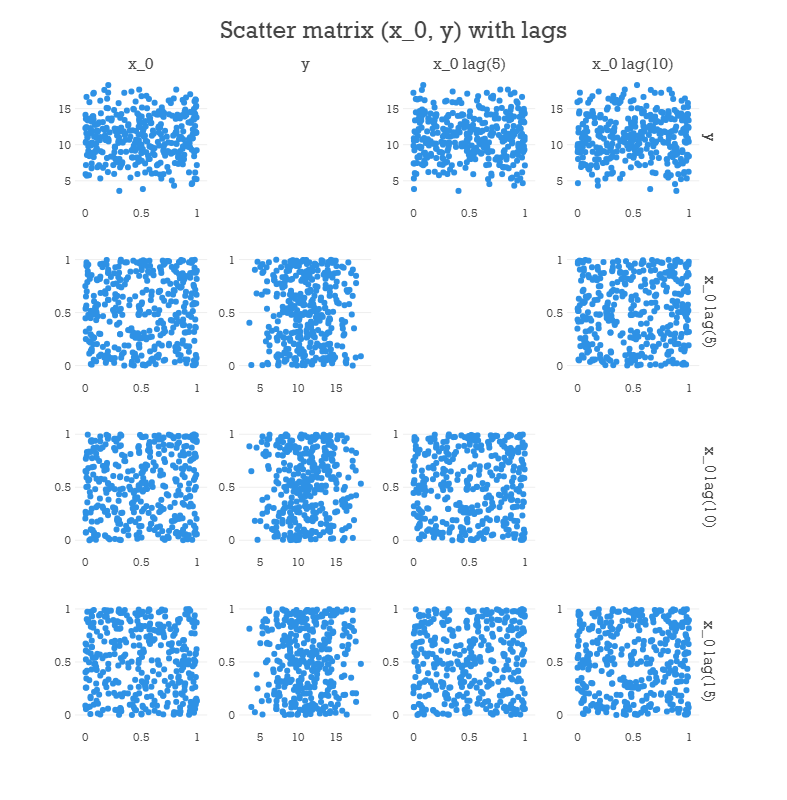

In [18]:
plot_scatter_matrix(total_df, var1 = "x_0", var2="y", lags1 = [5, 10, 15])

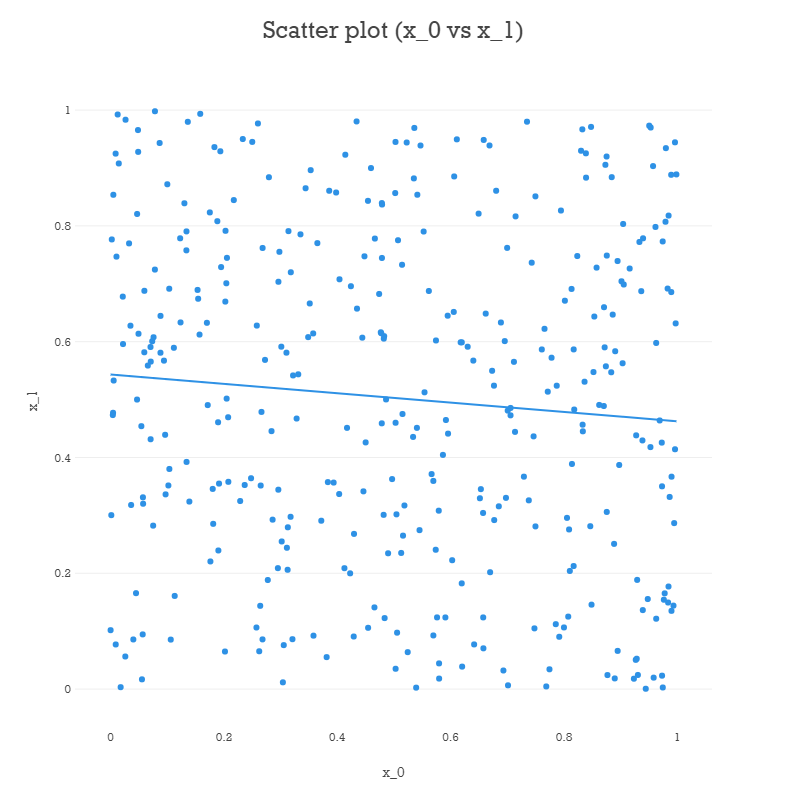

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.818
Date:                Tue, 02 Mar 2021   Prob (F-statistic):             0.0941
Time:                        11:30:11   Log-Likelihood:                -61.453
No. Observations:                 366   AIC:                             126.9
Df Residuals:                     364   BIC:                             134.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5433      0.029     18.888      0.0

In [19]:
plot_scatter_fit(total_df, "x_0", "x_1", fit = "summary")

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



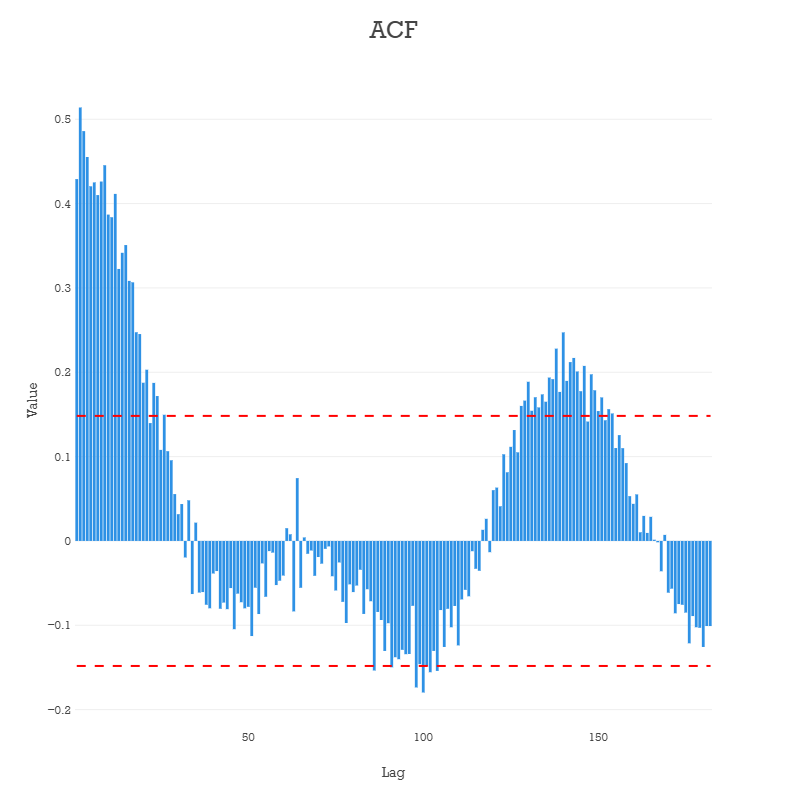

In [20]:
plot_acf(ts_df, show_threshold = True)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



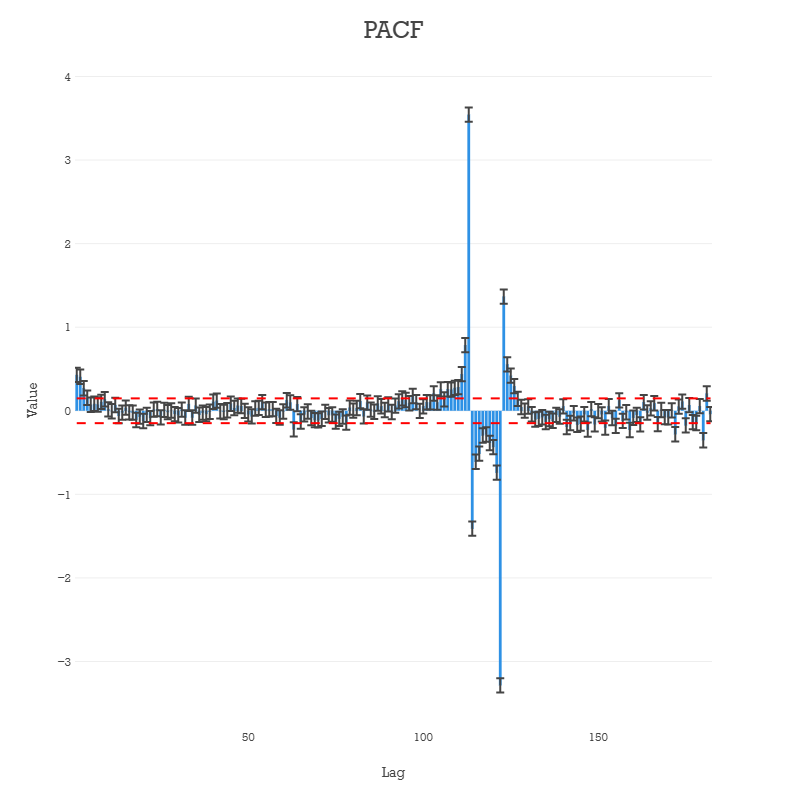

In [21]:
plot_acf(ts_df, partial=True, alpha = 0.1, show_threshold = True)

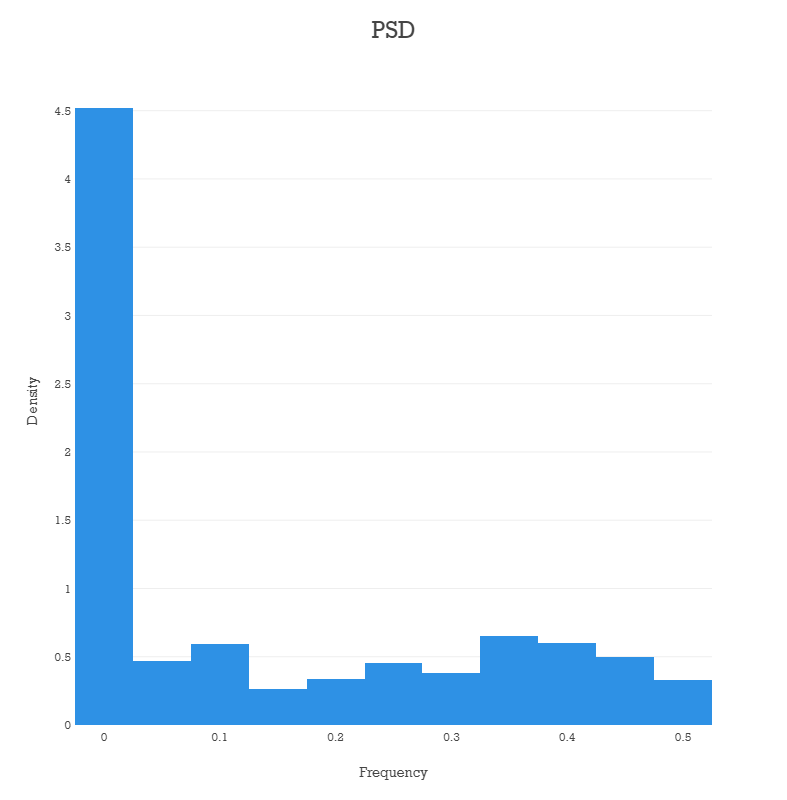

In [34]:
plot_psd(ts_df, scaling="spectrum")

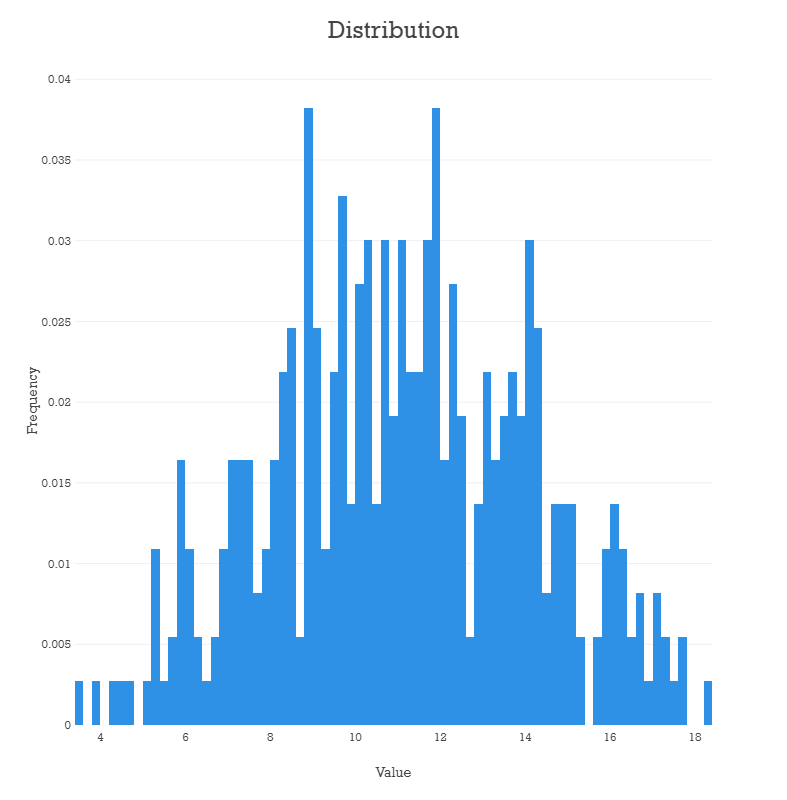

In [37]:
plot_distribution(total_df, bins=100, title="Distribution")

In [24]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

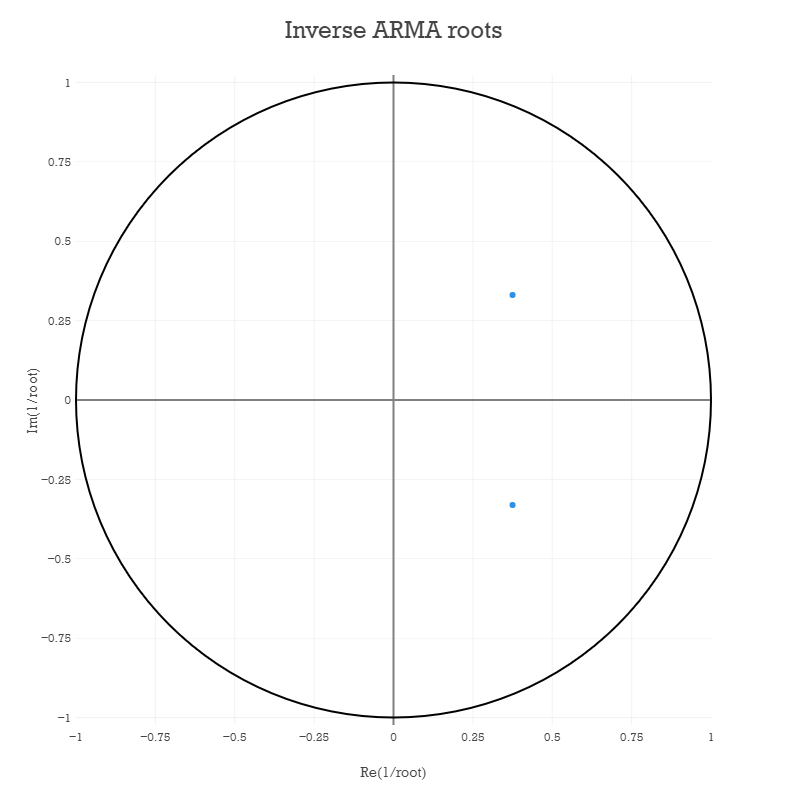

In [25]:
plot_inverse_arma_roots(arma_process)

In [53]:
plot_extended_scatter_matrix(total_df.dropna(), y_cols=["y", "x_1", "x_2"])

y
a                     y       x_1       x_2
t                                        
2020-02-01   9.076290  0.106448  0.863685
2020-02-02  10.139678  0.336268  0.355793
2020-02-03   9.016519  0.770186  0.228452
2020-02-04   7.283376  0.905453  0.413000
2020-02-05   9.126976  0.983337  0.390666
...               ...       ...       ...
2020-12-27   9.741380  0.726342  0.733182
2020-12-28  16.381045  0.728834  0.692305
2020-12-29  10.226760  0.606907  0.104795
2020-12-30  15.985027  0.426007  0.769140
2020-12-31  11.895305  0.105828  0.289154

[335 rows x 3 columns]
                    y
t                    
2020-02-01   9.076290
2020-02-02  10.139678
2020-02-03   9.016519
2020-02-04   7.283376
2020-02-05   9.126976
...               ...
2020-12-27   9.741380
2020-12-28  16.381045
2020-12-29  10.226760
2020-12-30  15.985027
2020-12-31  11.895305

[335 rows x 1 columns]
x_1
a                     y       x_1       x_2
t                                        
2020-02-01   9.076290  0.1

KeyError: 'variable'

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



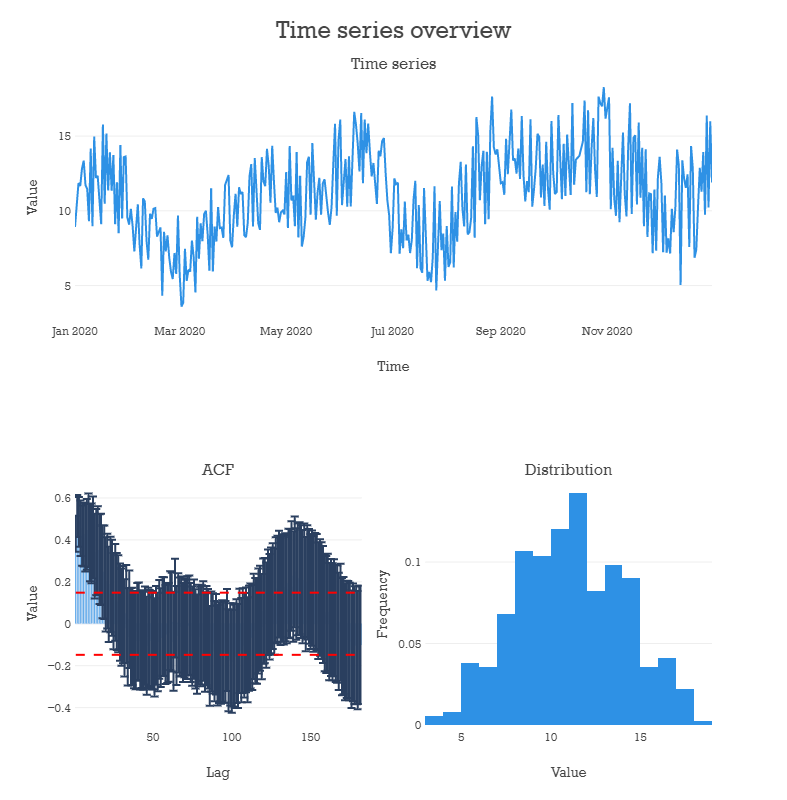

In [36]:
plot_ts_overview(ts_df)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



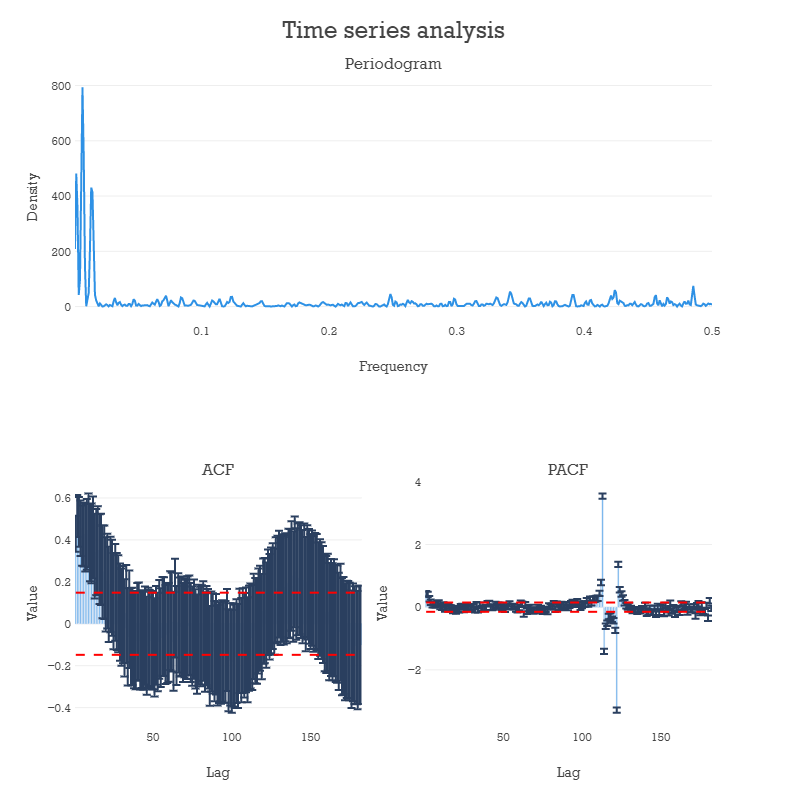

In [30]:
plot_ts_analysis(ts_df)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



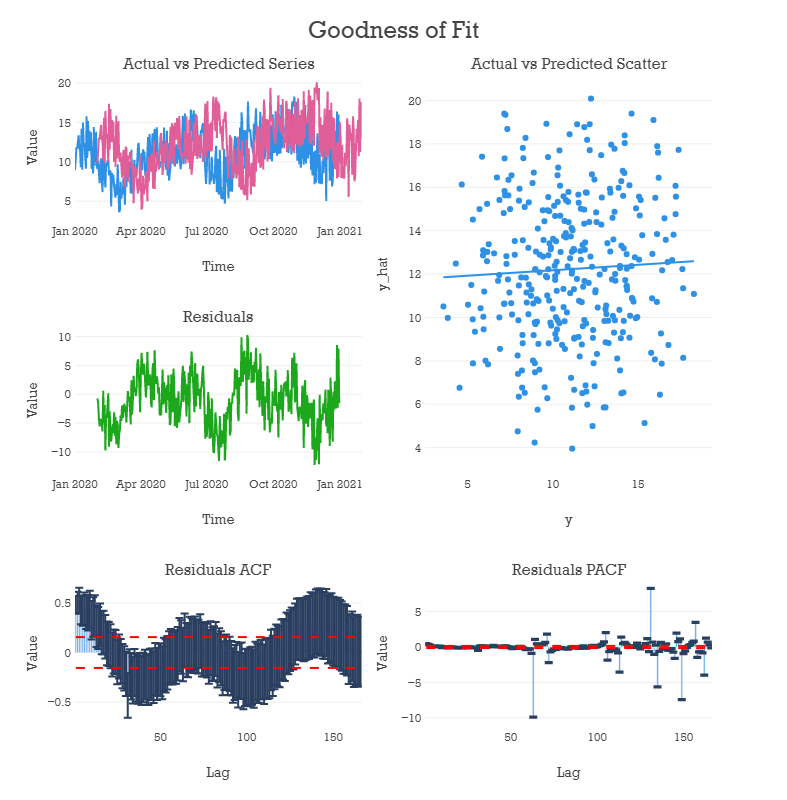

In [31]:
plot_gof(total_df, "y", "y_hat")

In [32]:
import os
from pytsviz.global_vars import root_path
data_path = os.path.join(root_path, "data", "crypto.csv")
from copy import deepcopy
df = pd.read_csv(data_path, index_col=0, parse_dates=True, dayfirst=True)

testing_dict = {
    plot_acf: {
            "df": df,
            "y_col": "LTC"
    },
    plot_psd: {
            "df": df,
            "y_col": "LTC"
    },
    plot_ts_analysis: {
            "df": df,
            "y_col": "LTC"
    },
    plot_distribution: {
            "df": df,
            "y_col": "LTC"
    },
    plot_gof: {
            "df": df,
            "y_col": "LTC",
            "y_hat_col": "LTC_fc"
    },
    plot_ts: {
            "df": df,
            "tf": "moving_average"
    },
    plot_seasonal_ts: {
            "df": df,
            "period": "quarter",
            "y_col": "LTC"
    },
    plot_decomposed_ts: {
            "df": df,
            "method": "STL",
    },
    plot_forecast: {
            "df": df,
            "y_col": "LTC",
            "fc_cols": ["LTC_fc"],
            "lower_col": "LTC_lb",
            "upper_col": "LTC_ub"
    },
    plot_scatter_matrix: {
            "df": df,
            "var1": "LTC",
            "var2": "BTC",
            "lags1": [5],
            "lags2": [5]
    },
    plot_scatter_fit: {
            "df": df,
            "var1": "LTC",
            "var2": "BTC"
    },
    plot_inverse_arma_roots: {
            "process": sm.tsa.ArmaProcess(np.r_[1, np.array([-.75, .25])],  np.r_[1, np.array([.65, .35])])
    },
    plot_extended_scatter_matrix: {
            "df": df
    },
    plot_ts_overview: {
            "series": df["LTC"]
    }
}

In [ ]:
for func_dict in testing_dict.items():
    func, kwargs = func_dict
    print(func, kwargs)
    processed_kwargs = deepcopy(kwargs)
    func(**processed_kwargs)
    
    for k in kwargs.keys():
        print(kwargs[k], processed_kwargs[k])


In [62]:
total_df.filter("y_hat")

y
t                    
2020-01-01   8.918116
2020-01-02  10.669143
2020-01-03  11.855201
2020-01-04  11.662385
2020-01-05  12.822046
...               ...
2021-01-27        NaN
2021-01-28        NaN
2021-01-29        NaN
2021-01-30        NaN
2021-01-31        NaN

[397 rows x 1 columns]